In [89]:
import pandas 
import sklearn 
from sklearn import svm 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
import seaborn as sb 
import matplotlib.pyplot as plt
from random import randint 
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing as prep
import csv
from sklearn import datasets, linear_model

In [2]:
data_frame_train = pandas.read_csv('all/train.csv')
df_orig = data_frame_train.copy()
data_frame_test = pandas.read_csv('all/test.csv')

### Initial Test 

In [3]:
rows, col = data_frame_train.shape
tr_rows = int(rows * .80)
val_rows = rows - tr_rows 
train_df = data_frame_train[:tr_rows]
val_df = data_frame_train[tr_rows+1:]
val_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


In [4]:
df_train_ground_truth = train_df['Survived']
df_val_ground_truth = val_df['Survived']

In [5]:
train_df=train_df.drop(['Survived'],axis=1)
train_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
val_df = val_df.drop(['Survived'],axis=1)
val_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
713,714,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
714,715,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
715,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
716,717,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
717,718,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S


In [7]:
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0})
val_df['Sex'] = val_df['Sex'].map({'female':1, 'male':0})

In [8]:
train_df=train_df.drop(['Name'],axis=1)
train_df=train_df.drop(['Cabin'],axis=1)
train_df=train_df.drop(['Embarked'],axis=1)
val_df=val_df.drop(['Name'],axis=1)
val_df=val_df.drop(['Cabin'],axis=1)
val_df=val_df.drop(['Embarked'],axis=1)
val_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
713,714,3,0,29.0,0,0,7545,9.4833
714,715,2,0,52.0,0,0,250647,13.0000
715,716,3,0,19.0,0,0,348124,7.6500
716,717,1,1,38.0,0,0,PC 17757,227.5250
717,718,2,1,27.0,0,0,34218,10.5000


In [9]:
train_df=train_df.drop(['Ticket'],axis=1)
val_df=val_df.drop(['Ticket'],axis=1)


In [10]:
train_df.fillna(0, inplace=True)
val_df.fillna(0, inplace=True)

In [11]:
clf = svm.SVC()
clf.fit(train_df.values, df_train_ground_truth.values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = clf.predict(val_df.values)

In [13]:
mean_absolute_error(df_val_ground_truth.values, y_pred)

0.3539325842696629

### Check for missing data 

In [14]:
data_frame_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_train_copy = data_frame_train.copy()
df_train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


My first data cleaning will be to drop the name, ticket, and cabin. I will turn embarked, and sex into categorical data. The age has missing data. I will attempt to augment this data with ages that are within the standdard deviation of the average age. Tomorrow, I plan to turn male/female and the embarked data into catergorical data 

In [16]:
df_train_copy = df_train_copy.drop(['Name'], axis=1)
df_train_copy = df_train_copy.drop(['PassengerId'], axis=1)
df_train_copy = df_train_copy.drop(['Ticket'], axis=1)
df_train_copy = df_train_copy.drop(['Cabin'], axis=1)
df_train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
#setting the nan values in age to average age 
std = int(df_train_copy['Age'].std(skipna=True))
avg = int(df_train_copy['Age'].mean())
print(avg)
print(std)
df_train_copy['Age'].fillna(avg, inplace=True)

29
14


### Turning the categorical variables into dummy variables 
- will need to do this for embarked and sex 

In [18]:
sex = pandas.get_dummies(df_train_copy['Sex'], drop_first=True)
sex.head()
emb = pandas.get_dummies(df_train_copy['Embarked'], drop_first=True)
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
df_train_copy = df_train_copy.drop(['Sex', 'Embarked'], axis=1)
df_train_copy1 = pandas.concat([df_train_copy, sex, emb], axis=1)
df_train_copy1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### Logistic Regression 

In [20]:
X = df_train_copy1.iloc[:,1:].values
y = df_train_copy1.iloc[:,0].values
y_train = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = log_reg.predict(X_test)

In [23]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[92 13]
 [24 50]]


In [24]:
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

             precision    recall  f1-score   support

          0       0.79      0.88      0.83       105
          1       0.79      0.68      0.73        74

avg / total       0.79      0.79      0.79       179

0.793296089385


### SVM 

In [25]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[86 19]
 [38 36]]
             precision    recall  f1-score   support

          0       0.69      0.82      0.75       105
          1       0.65      0.49      0.56        74

avg / total       0.68      0.68      0.67       179

0.68156424581


### Navie Bayesian

In [27]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[87 18]
 [26 48]]
             precision    recall  f1-score   support

          0       0.77      0.83      0.80       105
          1       0.73      0.65      0.69        74

avg / total       0.75      0.75      0.75       179

0.754189944134


### KNN 

In [29]:
n = int(len(X_train)/2)
print(n)

356


In [30]:
acc_list=[]
for i in range(1,n+1):
    nbrs = neighbors.KNeighborsClassifier(i)
    nbrs.fit(X_train, y_train)
    y_pred = nbrs.predict(X_test)
    accurarcy = accuracy_score(y_test, y_pred)
    acc_list.append(accurarcy)

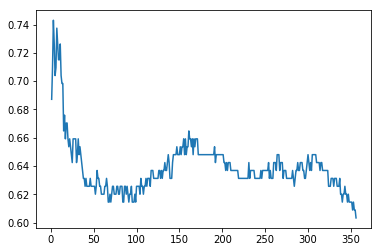

0.743016759777
2


In [31]:
axX = list(range(1, n+1))
ax = plt.axes()
ax.plot(axX, acc_list)
plt.show()
print(max(acc_list))
print(acc_list.index(max(acc_list)))

In [90]:
class dataTester:
    def __init__(self):
        self.model_dic = {"LogReg":LogisticRegression(), "NavBayes": GaussianNB(), "SVM":svm.SVC(), "DecisionTree": DecisionTreeClassifier(), "LinearReg": linear_model.LinearRegression()}
        self.X_train = None
        self.y_train = None
        self.X_test = None 
        self.y_test = None
        self.n = None
    def KNN_max(self):
        rows = int(len(self.X_train)/2)
        acc_list=[]
        for i in range(1,n+1):
            nbrs = neighbors.KNeighborsClassifier(i)
            nbrs.fit(self.X_train, self.y_train)
            y_pred = nbrs.predict(self.X_test)
            accurarcy = accuracy_score(self.y_test, y_pred)
            acc_list.append(accurarcy)
        self.n = acc_list.index(max(acc_list))
    def trainAcc(self, X, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2)
        self.KNN_max()
        acc_dic = {}
        for i in self.model_dic: 
            scores = cross_val_score(self.model_dic[i], X, y, cv=5)
            acc = scores.mean()
            acc_dic[i] = acc
        scores = cross_val_score(neighbors.KNeighborsClassifier(self.n), X, y, cv=5)
        acc = scores.mean()
        acc_dic["KNN"] = acc
        return acc_dic
        
    def testAcc(self, X, passenger_list, trainX, trainY):
        for i in self.model_dic: 
            print("trainX",trainX.shape)
            print("trainY",trainY.shape)
            print("X", X.shape)
            self.model_dic[i].fit(trainX, trainY)
            y = self.model_dic[i].predict(X)
            csv_name = i + ".csv" 
            with open(csv_name, "w") as file: 
                #csv.writer(csvfile, delimiter=' ',
                #            quotechar='|', quoting=csv.QUOTE_MINIMAL)
                result_writer = csv.writer(file)
                for i in range(len(passenger_list)):
                    result_writer.writerow([passenger_list[i], y[i]])            

In [91]:
x = dataTester()
results = x.trainAcc(X, y)

In [92]:
print(results)

{'LogReg': 0.81594162963372763, 'NavBayes': 0.80023012376466729, 'SVM': 0.72629187949302554, 'DecisionTree': 0.78004249966398176, 'LinearReg': 0.39677222237711396, 'KNN': 0.70489270998128573}


#### Feature Engineering 
This is my attempt get more revelant from my data set. 

The first thing is that I am going to see if the data is highly correlated. It seems that only Parch and SibSp are highly correlated, also PClass and  are negatively correlated. 

In [93]:
df_feature_eng = df_orig.copy()
df_feature_eng= df_feature_eng.drop(['Name'], axis=1)
df_feature_eng = df_feature_eng.drop(['PassengerId'], axis=1)
df_feature_eng= df_feature_eng.drop(['Ticket'], axis=1)
df_feature_eng = df_feature_eng.drop(['Cabin'], axis=1)
df_emb =  pandas.Categorical(df_feature_eng.Embarked)
df_feature_eng['Embarked'] = df_emb.codes
#df_feature_eng['Embarked'] = df_feature_eng['Embarked'].appy(lambda )
corr = df_feature_eng.corr()
heatMap = sb.heatmap(corr, annot=True, cbar=True)
df_feature_eng.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


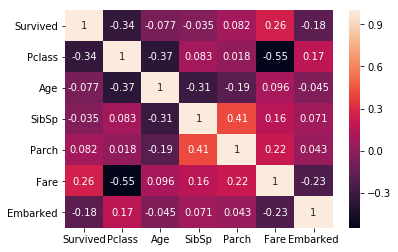

In [94]:
plt.show()

The next thing I want to do is try to see if I can get any additional data from the some of the stuff I threw out. I specifically think name, cabin, and maybe ticket number will be useful 

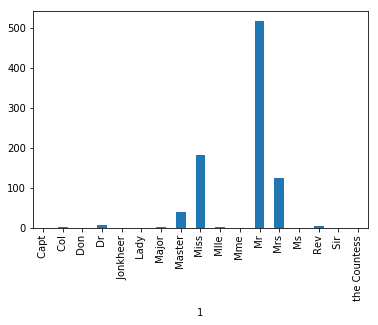

In [95]:
df_names = df_orig['Name'].str.split('[,.]', expand=True)
df_name_count = df_names.groupby([1]).count()
df_name_count[0].plot(kind='bar')
plt.show()

In [96]:
df_names.head()

,0,1,2,3
0,Braund,Mr,Owen Harris,None
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer),None
2,Heikkinen,Miss,Laina,None
3,Futrelle,Mrs,Jacques Heath (Lily May Peel),None
4,Allen,Mr,William Henry,None


In [97]:
df_names_clean = df_names[1].str.strip()
df_names[1] = df_names_clean

In [98]:
df_names[1].values[df_names[1].isin(['Mlle','Ms'])] = 'Miss'

In [99]:
df_names[1].values[df_names[1].isin(['Mme'])] = 'Mrs'

In [100]:
unique_titles = df_names[1].unique().tolist()
unique_titles.remove('Mrs')
unique_titles.remove('Mr')
unique_titles.remove('Miss')
print(unique_titles)

['Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [101]:
df_names[1].values[df_names[1].isin(unique_titles)] = 'Special'

In [102]:
test = pandas.get_dummies(df_names[1])
test.head()

,Miss,Mr,Mrs,Special
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [103]:
df_train_feature = pandas.concat([df_train_copy1, test], axis=1)
df_train_feature.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Special
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0


In [104]:
X = df_train_feature.iloc[:,1:].values
y = df_train_feature.iloc[:,0].values

In [105]:
data_tester = dataTester()
data_tester.trainAcc(X, y)

{'DecisionTree': 0.78788876606637315,
 'KNN': 0.70046744665465877,
 'LinearReg': 0.39677222237711396,
 'LogReg': 0.81594162963372763,
 'NavBayes': 0.80023012376466729,
 'SVM': 0.72629187949302554}

### Test Data dataprocessing

In [106]:
df_test = pandas.read_csv('all/test.csv')
passenger_id = df_test['PassengerId']
passenger_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [107]:

df_test = df_test.drop(['PassengerId'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)
avg = int(df_train_copy['Age'].mean())
print(avg)
df_test['Age'].fillna(avg, inplace=True)
df_test.head()

29


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [108]:
sex = pandas.get_dummies(df_test['Sex'], drop_first=True)
sex.head()
emb = pandas.get_dummies(df_test['Embarked'], drop_first=True)
emb.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [109]:
df_test = pandas.concat([df_test, sex, emb], axis=1)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,0,1


In [110]:
df_test=df_test.drop(['Sex','Embarked'], axis=1)
df_test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,0,0,1


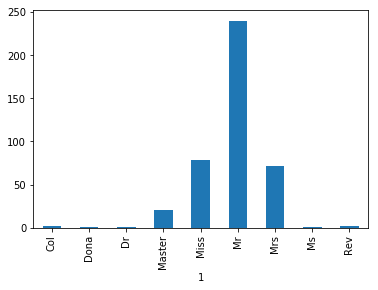

In [111]:
df_names = df_test['Name'].str.split('[,.]', expand=True)
df_names_clean = df_names[1].str.strip()
df_names[1] = df_names_clean
df_name_count = df_names.groupby([1]).count()
df_name_count[0].plot(kind='bar')
plt.show()

In [112]:
df_names[1].values[df_names[1].isin(['Mlle','Ms'])] = 'Miss'
df_names[1].values[df_names[1].isin(['Mme'])] = 'Mrs'
unique_titles = df_names[1].unique().tolist()
unique_titles.remove('Mrs')
unique_titles.remove('Mr')
unique_titles.remove('Miss')
print(unique_titles)

['Master', 'Col', 'Rev', 'Dr', 'Dona']


In [113]:
df_names[1].values[df_names[1].isin(unique_titles)] = 'Special'
test = pandas.get_dummies(df_names[1])
test.head()

,Miss,Mr,Mrs,Special
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [114]:
df_test_feature = pandas.concat([df_test, test], axis=1)
df_test_feature.head()
df_test_feature = df_test_feature.drop(['Name'], axis=1)
df_test_feature.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Special
0,3,34.5,0,0,7.8292,1,1,0,0,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,1,0,0
4,3,22.0,1,1,12.2875,0,0,1,0,0,1,0


In [115]:
avg_fare = df_test_feature['Fare'].mean()
print(avg_fare)
df_test_feature.fillna(avg_fare, inplace=True)

35.6271884892086


In [116]:
df_test_feature.isnull().sum()
df_test_feature.shape

(418, 12)

In [119]:
y_total = df_orig.iloc[:,1].values


In [120]:
#data_tester.trainAcc(X, y)
data_test = dataTester()
X_test = df_test_feature.values
passenger_id_v = passenger_id.values
data_test.testAcc(X_test, passenger_id_v, X, y_total)

trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)


This first attempt is alright, the logistic regression was the best perfomance of the the five submissions I tried. I added linear regression to my data tester class. It was not at all effective, in fact, linear regression was my worst performing model in the data set. This gives me evidence that the data was mostly non-linear. 

I am going to scale the data because I think this will improve my logistic regression. I am going to scale the data such that the max of all the columns that have values that are greater than 1 is that denominator 

In [130]:
maxAge = df_train_feature['Age'].max()
df_train_feature['Age'] = df_train_feature['Age']/maxAge
df_test_feature['Age'] = df_test_feature['Age']/maxAge
maxFare = df_train_feature['Fare'].max()
df_train_feature['Fare'] = df_train_feature['Fare']/maxFare
df_test_feature['Fare'] = df_test_feature['Fare']/maxFare
print(maxAge, maxFare)

1.0 512.3292


In [131]:
df_train_feature.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Miss,Mr,Mrs,Special
0,0,3,0.2750,1,0,0.014151,1,0,1,0,1,0,0
1,1,1,0.4750,1,0,0.139136,0,0,0,0,0,1,0
2,1,3,0.3250,0,0,0.015469,0,0,1,1,0,0,0
3,1,1,0.4375,1,0,0.103644,0,0,1,0,0,1,0
4,0,3,0.4375,0,0,0.015713,1,0,1,0,1,0,0


In [132]:
data_test = dataTester()
data_test.trainAcc(df_train_feature.values, y_total)


{'DecisionTree': 1.0,
 'KNN': 0.95401376061383358,
 'LinearReg': 1.0,
 'LogReg': 1.0,
 'NavBayes': 1.0,
 'SVM': 0.99888268156424576}

In [140]:
X = df_train_feature.iloc[:,1:].values
data_test.testAcc(df_test_feature.values, passenger_id_v, X, y_total)

trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)
trainX (891, 12)
trainY (891,)
X (418, 12)


Scaling made my training scores go way up. However, when I submitted my test predictions my accuracy actually went down. I am wondering if I should have scaled it a different way. Maybe instead of using max, I should have used average values. I also should check for over and under fitting. I also noticed that depending on which model I used I got different predictions, I think I should use a max vote to avoid the issues that any single model would introduce.  